### Gaussian Mixtures

In [63]:
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
import numpy as np

X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))

X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)

X2 = X2 + [6, -8]

x = np.r_[X1, X2]
y = np.r_[y1, y2]

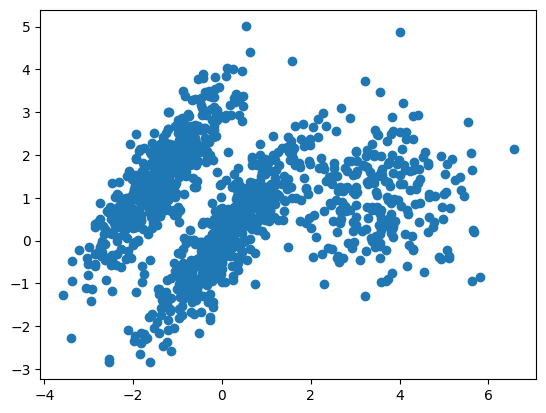

In [64]:
plt.scatter(x[:, 0], x[:, 1])

In [65]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, n_init=10, random_state=42)
gm.fit(x)


GaussianMixture(n_components=3, n_init=10, random_state=42)

In [66]:
gm.weights_

array([0.39025715, 0.40007391, 0.20966893])

In [67]:
gm.means_  # the mean of each cluster, in this case means the center of each cluster

array([[ 0.05131611,  0.07521837],
       [-1.40763156,  1.42708225],
       [ 3.39893794,  1.05928897]])

#### this returns the covariance matrix for each cluster, the diagonal elements are the variance of each variable, the good diagonal is in which elements are the same for each cluster
#### this means that in the first cluster the variables are positively correlated
#### and in the third cluster the variables are negatively correlated


In [68]:
gm.covariances_

array([[[ 0.68799922,  0.79606357],
        [ 0.79606357,  1.21236106]],

       [[ 0.63479409,  0.72970799],
        [ 0.72970799,  1.1610351 ]],

       [[ 1.14833585, -0.03256179],
        [-0.03256179,  0.95490931]]])

In [69]:
gm.converged_

True

In [70]:
gm.n_iter_

4

In [71]:
gm.predict(x)

array([0, 0, 1, ..., 2, 2, 2], dtype=int64)

In [72]:
gm.predict_proba(x).round(3)

array([[0.977, 0.   , 0.023],
       [0.983, 0.001, 0.016],
       [0.   , 1.   , 0.   ],
       ...,
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ]])

#### A Gaussian Mixture is a generative model, it can generate new instances that are likely to belong to the training set


In [73]:
x_new, y_new = gm.sample(6)

x_new

array([[-0.86944074, -0.32767626],
       [ 0.29836051,  0.28297011],
       [-2.8014927 , -0.09047309],
       [ 3.98203732,  1.49951491],
       [ 3.81677148,  0.53095244],
       [ 2.84104923, -0.73858639]])

In [74]:
y_new

array([0, 0, 1, 2, 2, 2])

In [75]:
gm.score_samples(x)

array([-2.60768954, -3.57110232, -3.32987086, ..., -3.51347241,
       -4.39798588, -3.80746532])

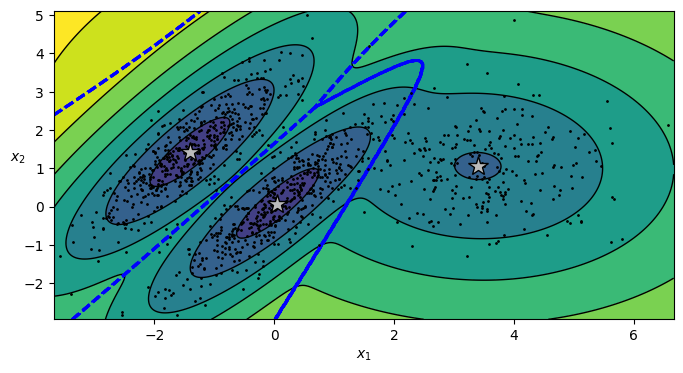

In [93]:
from matplotlib.colors import LogNorm


def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='b', linestyles='--')

    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

    plt.plot(clusterer.means_[:, 0], clusterer.means_[:, 1], 'w*', markersize=15,
             markeredgewidth=1, markeredgecolor='k', markerfacecolor='#bbbbbb')

    plt.xlabel("$x_1$")
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)


plt.figure(figsize=(8, 4))

plot_gaussian_mixture(gm, x)


You can impose constraints on the covariance matrices that the algorithm looks for by setting the covariance_type hyperparameter:

**"spherical"**: all clusters must be spherical, but they can have different diameters (i.e., different variances).
**"diag"**: clusters can take on any ellipsoidal shape of any size, but the ellipsoid's axes must be parallel to the axes (i.e., the covariance matrices must be diagonal).
**"tied"**: all clusters must have the same shape, which can be any ellipsoid (i.e., they all share the same covariance matrix).
**"full"** (default): no constraint, all clusters can take on any ellipsoidal shape of any size.

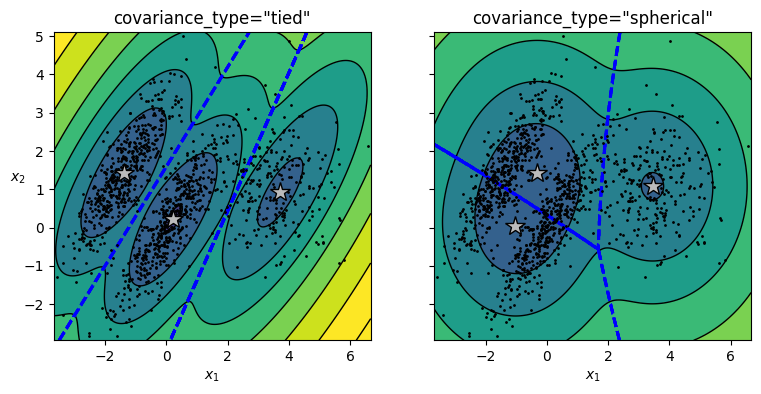

In [94]:
gm_full = GaussianMixture(n_components=3, n_init=10, covariance_type="full", random_state=42)
gm_tied = GaussianMixture(n_components=3, n_init=10, covariance_type="tied", random_state=42)
gm_spherical = GaussianMixture(n_components=3, n_init=10, covariance_type="spherical", random_state=42)
gm_diag = GaussianMixture(n_components=3, n_init=10, covariance_type="diag", random_state=42)
gm_full.fit(x)
gm_tied.fit(x)
gm_spherical.fit(x)
gm_diag.fit(x)


def compare_gaussian_mixtures(gm1, gm2, X):
    plt.figure(figsize=(9, 4))

    plt.subplot(121)
    plot_gaussian_mixture(gm1, X)
    plt.title(f'covariance_type="{gm1.covariance_type}"')

    plt.subplot(122)
    plot_gaussian_mixture(gm2, X, show_ylabels=False)
    plt.title(f'covariance_type="{gm2.covariance_type}"')


compare_gaussian_mixtures(gm_tied, gm_spherical, x)

plt.show()

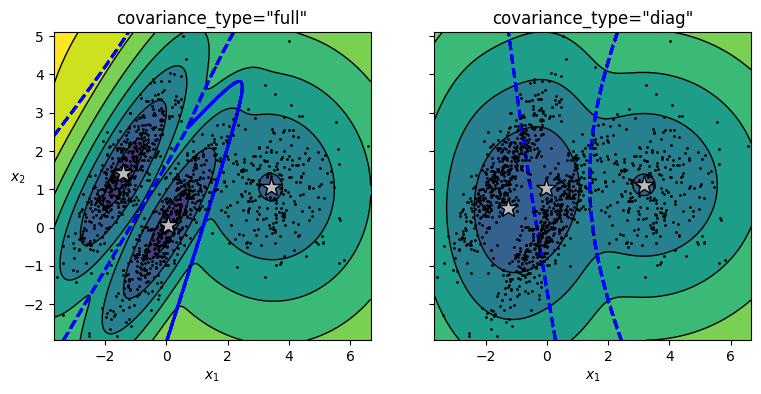

In [95]:
compare_gaussian_mixtures(gm_full, gm_diag, x)

### Using Gaussian Mixtures for Anomaly Detection


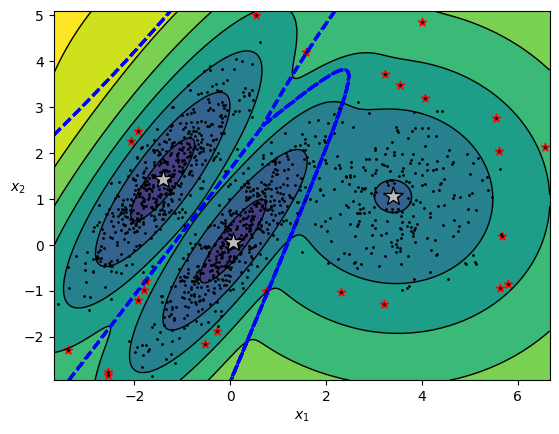

In [98]:
densities = gm.score_samples(x)
density_threshold = np.percentile(densities, 2)
anomalies = x[densities < density_threshold]

plot_gaussian_mixture(gm, x)
plt.scatter(anomalies[:, 0], anomalies[:, 1], color="r", marker="*")

### So, if we must to select clusters for anomaly detection, how we can do it?
#### with K-Means we can use the silhouette score, but with Gaussian Mixtures we can't use it, because it is a generative model, so we can't use the silhouette score, so we can use the BIC(Bayesian information criterion) score or the AIC(Akaike information criterion) score, to find the best number of clusters
#### the BIC and AIC scores are based on the likelihood of the model, so penalize models that have more parameters to learn and reward models that fit the data well, when we they differ. the model selected by the BIC tends to be simpler than the model selected by the AIC, but tends to not fit the data quite as well(this is especially true for larger datasets).



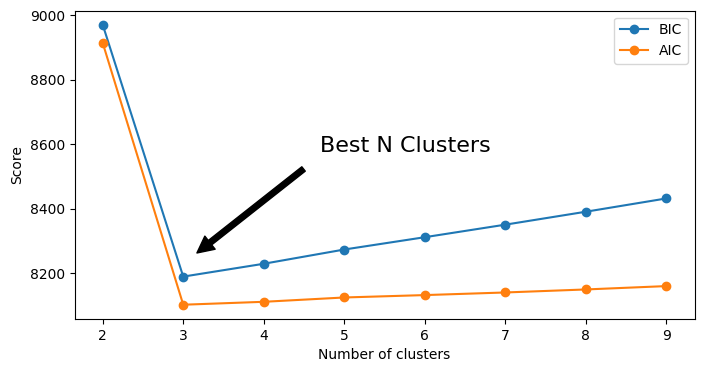

In [116]:
bic_data = []
aic_data = []
n_clusters = range(2, 10)

for range_n_clusters in range(2, 10):
    gm = GaussianMixture(n_components=range_n_clusters, n_init=10, random_state=42)
    gm.fit(x)

    bic, aic = gm.bic(x), gm.aic(x)

    bic_data.append(bic)
    aic_data.append(aic)

plt.figure(figsize=(8, 4))
plt.plot(n_clusters, bic_data, label="BIC", marker="o")
plt.plot(n_clusters, aic_data, label="AIC", marker="o")
plt.annotate('Best N Clusters',
             xy=(3, bic_data[2]),
             xytext=(0.40, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
             )
plt.legend()
plt.xlabel("Number of clusters")
plt.ylabel("Score")
plt.show()


#### rather than using the BIC or AIC scores, we can use the BayesianGaussianMixture class, which selects the best number of clusters automatically, based on the BIC score

##### if the weight is close to 0, it means that the cluster is not very important, so as we can see, we only need 3 clusters the rest are not important because are 0


In [119]:
from sklearn.mixture import BayesianGaussianMixture

bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
bgm.fit(x)

np.round(bgm.weights_, 2)

array([0.4 , 0.21, 0.4 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])